# Survival Analysis (1)

- source : lifelines documents (https://lifelines.readthedocs.io/)

- Survival Analysis is useful for searching break of machine or User's churn rate...and so on.
- It usually uses 'Kaplan-Meier'.

- package : lifelines

In [5]:
import pandas as pd
import lifelines
import matplotlib.pylab as plt
%matplotlib inline 

In [6]:
data = lifelines.datasets.load_dd()

### political leaders
- start : birth
- end : retirement

In [7]:
data.head()
data.tail()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
1803,Zambia,551,551.0,Eastern Africa,Africa,Levy Patrick Mwanawasa,Levy Patrick Mwanawasa.Zambia.2002.2007.Civili...,Non-democracy,Civilian Dict,2002,6,1
1804,Zambia,551,551.0,Eastern Africa,Africa,Rupiah Bwezani Banda,Rupiah Bwezani Banda.Zambia.2008.2008.Civilian...,Non-democracy,Civilian Dict,2008,1,0
1805,Zimbabwe,552,552.0,Eastern Africa,Africa,Ian Smith,Ian Smith.Zimbabwe.1965.1978.Civilian Dict,Non-democracy,Civilian Dict,1965,14,1
1806,Zimbabwe,552,552.0,Eastern Africa,Africa,Abel Muzorewa,Abel Muzorewa.Zimbabwe.1979.1979.Civilian Dict,Non-democracy,Civilian Dict,1979,1,1
1807,Zimbabwe,552,552.0,Eastern Africa,Africa,Robert Mugabe,Robert Mugabe.Zimbabwe.1980.2008.Civilian Dict,Non-democracy,Civilian Dict,1980,29,0


In [8]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
# kaplan-meier 

# KaplanMeierFitter.fit(event_times, event_observed=None,
#                      timeline=None, label='KM-estimate',
#                      alpha=None)
"""Parameters:
  event_times: an array, or pd.Series, of length n of times that
         the death event occured at
  event_observed: an array, or pd.Series, of length n -- True if
        the death was observed, False if the event was lost
        (right-censored). Defaults all True if event_observed==None
  timeline: set the index of the survival curve to this postively increasing array.
  label: a string to name the column of the estimate.
  alpha: the alpha value in the confidence intervals.
         Overrides the initializing alpha for this call to fit only.

Returns:
  self, with new properties like 'survival_function_'
""" 

"Parameters:\n  event_times: an array, or pd.Series, of length n of times that\n         the death event occured at\n  event_observed: an array, or pd.Series, of length n -- True if\n        the death was observed, False if the event was lost\n        (right-censored). Defaults all True if event_observed==None\n  timeline: set the index of the survival curve to this postively increasing array.\n  label: a string to name the column of the estimate.\n  alpha: the alpha value in the confidence intervals.\n         Overrides the initializing alpha for this call to fit only.\n\nReturns:\n  self, with new properties like 'survival_function_'\n"

In [9]:
T = data["duration"]
C = data["observed"]
kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

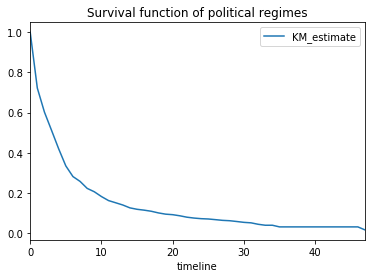

In [10]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

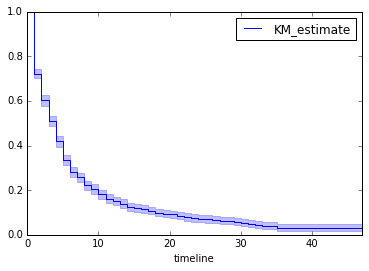

In [9]:
kmf.plot()

In [10]:
kmf.median_

## A leader is elected there is a 50% chance he or she will be gone in 3 years.

4.0

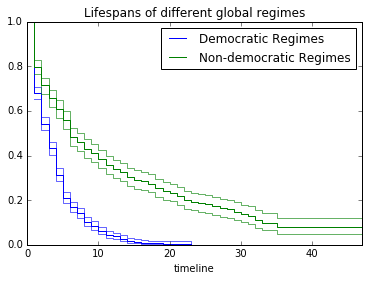

In [12]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=C[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=C[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

## ci_force_lines : force the confidence intervals to be line plots

plt.ylim(0,1);
plt.title("Lifespans of different global regimes");

Democratic regimes is shorter terms than Non-democratic regimes.